#Carga de datos y librerias


In [1]:
#Pandas es utilizado para leer los set de datos
import pandas as pd
#Numpy es utilizado para generar las series de datos a graficar
import numpy as np
#Seaborn es utilizado para generar los gráficos
import seaborn as sns
import matplotlib.pyplot as plt
#Se importan modulos estadisticos para generar test de hipotesis, entre otros
from sklearn.preprocessing import StandardScaler,MinMaxScaler
#Módulos implementa funciones que evalúan el error de predicción para propósitos específicos
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_squared_error as mse

#Dividir arreglos o matrices en subconjuntos aleatorios de tren y prueba
from sklearn.model_selection import train_test_split

#Biblioteca de Redes Neuronales
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential,model_from_json
from keras.layers import Dropout, LSTM, Dense, Activation,Input
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint

from hyperopt import Trials, STATUS_OK, tpe, hp, fmin, space_eval
from sklearn.model_selection import cross_val_score, KFold, cross_val_predict, TimeSeriesSplit
import time


In [2]:
pip install scikit-posthocs --quiet

In [3]:
# Para acceder a los archivos del gdrive
from google.colab import drive
drive.mount('/content/gdrive/')


Mounted at /content/gdrive/


In [4]:
cd /content/gdrive/MyDrive/Tesis/Datos-2

/content/gdrive/MyDrive/Tesis/Datos-2


#Analsisis de Error de cada modelo

In [5]:
result_mlp=pd.read_csv('results_MLP_CE.csv',index_col=0)
result_gru=pd.read_csv('results_GRU_CE.csv',index_col=0)
result_lstm=pd.read_csv('results_LSTM_CE.csv',index_col=0)
result_cnn=pd.read_csv('results_CNN_CE.csv',index_col=0)
result_transformer=pd.read_csv('results_Transformer_CE.csv',index_col=0)
result_svr=pd.read_csv('results_SVR_CE.csv',index_col=0)
result_elm=pd.read_csv('results_ELM_CE.csv',index_col=0)

In [6]:
print(result_mlp.shape)
print(result_gru.shape)
print(result_lstm.shape)
print(result_cnn.shape)
print(result_transformer.shape)
print(result_svr.shape)
print(result_elm.shape)

(500, 8)
(500, 8)
(500, 8)
(500, 8)
(500, 8)
(500, 8)
(500, 8)


##ELM

In [7]:
result_elm = result_elm.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_elm.head(5)


Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
429,ELM_sigm_108.0,86,5,0.008847,0.410243,2.145863,0.640503,0.487136
279,ELM_sigm_120.0,56,5,0.009752,0.414941,2.393076,0.644159,0.486971
319,ELM_sigm_118.0,64,5,0.009939,0.415654,1.796642,0.644712,0.478452
404,ELM_sigm_154.0,81,5,0.021836,0.419943,2.361075,0.648030,0.475267
379,ELM_sigm_148.0,76,5,0.018261,0.428851,2.564600,0.654867,0.491933


##SVR

In [8]:
result_svr = result_svr.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_svr.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
354,SVR_rbf_0.8772346347728702_0.5398462768583149_...,71,5,0.035124,0.348409,1.714970,0.590262,0.433681
344,SVR_rbf_0.8913495971886025_0.5341145467857797_...,69,5,0.035171,0.348436,1.714580,0.590285,0.433701
374,SVR_rbf_0.7974364176322617_0.5544894024977772_...,75,5,0.033814,0.348619,1.732445,0.590440,0.433526
369,SVR_rbf_0.8157675897302965_0.5433572936467199_...,74,5,0.034230,0.348690,1.722422,0.590500,0.433344
464,SVR_rbf_0.7612560431507306_0.5693187506697562_...,93,5,0.031291,0.349585,1.759451,0.591257,0.434633


##MLP

In [9]:
result_mlp = result_mlp.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_mlp.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
488,MLP_CE_98_4_800_70.0_3.0_416.0_0.67_adam_2.437...,98,4,5.377616,0.375814,0.613037,0.460232,203.494705
68,MLP_CE_14_4_800_40.0_3.0_320.0_0.52_adam_1.691...,14,4,6.487561,0.379791,0.616272,0.465164,213.475876
489,MLP_CE_98_5_800_70.0_3.0_416.0_0.67_adam_2.437...,98,5,9.411418,0.380050,0.616482,0.460444,190.512939
354,MLP_CE_71_5_800_30.0_3.0_192.0_0.67_adam_3.812...,71,5,9.018559,0.380055,0.616486,0.465961,182.855652
322,MLP_CE_65_3_800_30.0_3.0_160.0_0.42_adam_1.761...,65,3,10.069403,0.382736,0.618656,0.466213,194.553406


##GRU

In [10]:
result_mlp = result_gru.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_mlp.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
334,GRU_CE_67_5_800_10.0_3.0_500.0_0.49_adam_0.000...,67,5,27.252400,0.358205,0.598502,0.440844,194.151001
424,GRU_CE_85_5_800_10.0_2.0_800.0_0.54_adam_0.000...,85,5,20.559656,0.362767,0.602301,0.443280,186.456909
484,GRU_CE_97_5_800_10.0_3.0_400.0_0.47_adam_0.000...,97,5,25.128468,0.369431,0.607808,0.456008,192.567245
64,GRU_CE_13_5_800_50.0_2.0_800.0_0.63_adam_0.000...,13,5,9.445666,0.373207,0.610907,0.448703,204.133591
199,GRU_CE_40_5_800_20.0_2.0_540.0_0.7_adam_0.0001...,40,5,17.485842,0.374655,0.612090,0.455858,204.192612


##LSTM

In [11]:
result_lstm = result_lstm.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_lstm.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
139,LSTM_CE_800_10.0_1.0_680.0_0.52_adam_3.1458576...,28,5,36.681360,0.378168,0.614954,0.455236,220.871017
319,LSTM_CE_800_10.0_1.0_640.0_0.42_adam_4.4268419...,64,5,28.392772,0.379389,0.615946,0.456227,220.155869
299,LSTM_CE_800_20.0_1.0_780.0_0.68_adam_4.2855902...,60,5,23.493317,0.380622,0.616946,0.457438,223.087753
94,LSTM_CE_800_30.0_1.0_620.0_0.55_adam_3.4341560...,19,5,20.831620,0.380932,0.617197,0.456960,224.679672
499,LSTM_CE_800_20.0_2.0_480.0_0.54_adam_1.6602774...,100,5,51.668610,0.380971,0.617228,0.457549,221.807846


##CNN

In [12]:
result_cnn= result_cnn.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_cnn.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
173,CNN_CE_800_60.0_2.0_100.0_0.63_adam_3.21510030...,35,4,7.002579,0.372284,0.610150,0.447380,193.632339
343,CNN_CE_800_60.0_2.0_200.0_0.64_adam_2.54716769...,69,4,11.349024,0.372287,0.610153,0.453491,194.921432
279,CNN_CE_800_70.0_2.0_100.0_0.62_adam_1.53838502...,56,5,16.170364,0.372849,0.610613,0.448964,188.639374
394,CNN_CE_800_20.0_2.0_100.0_0.67_adam_4.88524469...,79,5,12.009378,0.373540,0.611179,0.450430,187.399948
333,CNN_CE_800_60.0_2.0_100.0_0.7_adam_2.909277765...,67,4,17.459790,0.375022,0.612391,0.447587,187.844406


##Transformer

In [13]:
result_transformer= result_transformer.sort_values(by='MSE', ascending=True)
print("Top 5 mejores resultados")
result_transformer.head(5)

Top 5 mejores resultados


,nameModel,trial_optimizacion_bayesiana,Step_validacion,time,MSE,RMSE,MAE,MAPE
index,,,,,,,,
439,Transformer_CE_800_40.0_128.0_6.0_0.64_160.0_3...,88,5,47.148076,0.370745,0.608889,0.442792,215.380447
159,Transformer_CE_800_20.0_192.0_6.0_0.59_128.0_4...,32,5,49.049351,0.372243,0.610117,0.453836,239.374893
259,Transformer_CE_800_50.0_128.0_5.0_0.47_160.0_2...,52,5,76.609337,0.374506,0.611969,0.451261,210.443329
494,Transformer_CE_800_40.0_128.0_6.0_0.61_160.0_3...,99,5,69.508075,0.374999,0.612372,0.450840,214.465591
299,Transformer_CE_800_10.0_160.0_6.0_0.59_96.0_4....,60,5,109.001675,0.377282,0.614233,0.453981,207.757339


#Se verifica normalidad de los errores de test

In [14]:
from scipy.stats import shapiro
import numpy as np
from scipy.stats import friedmanchisquare
from scikit_posthocs import posthoc_nemenyi
import scikit_posthocs as sp

In [15]:
def test_shapiro(data):
  stat, p = shapiro(data)
  print('stat=%.3f, p=%.3f' % (stat, p))
  if p > 0.05:
    print('Probably Gaussian')
    print("")
  else:
    print('Probably not Gaussian')
    print("")

In [16]:
print("Test de shapiro a Resutl MLP")
test_shapiro(result_mlp["MSE"])

print("Test de shapiro a Resutl ELM")
test_shapiro(result_elm["MSE"])

print("Test de shapiro a Resutl SVR")
test_shapiro(result_svr["MSE"])

print("Test de shapiro a Resutl GRU")
test_shapiro(result_gru["MSE"])

print("Test de shapiro a Resutl LSTM")
test_shapiro(result_lstm["MSE"])

print("Test de shapiro a Resutl CNN")
test_shapiro(result_cnn["MSE"])

print("Test de shapiro a Resutl transformer")
test_shapiro(result_transformer["MSE"])

Test de shapiro a Resutl MLP
stat=0.856, p=0.000
Probably not Gaussian

Test de shapiro a Resutl ELM
stat=0.093, p=0.000
Probably not Gaussian

Test de shapiro a Resutl SVR
stat=0.242, p=0.000
Probably not Gaussian

Test de shapiro a Resutl GRU
stat=0.856, p=0.000
Probably not Gaussian

Test de shapiro a Resutl LSTM
stat=0.943, p=0.000
Probably not Gaussian

Test de shapiro a Resutl CNN
stat=0.783, p=0.000
Probably not Gaussian

Test de shapiro a Resutl transformer
stat=0.665, p=0.000
Probably not Gaussian



In [19]:
def grafico_distribucion(data):
  plt.subplots(figsize=(7,3))
  sns.histplot(x=data,kde=True,color="blue",bins=30)
  plt.tight_layout()
  plt.show()

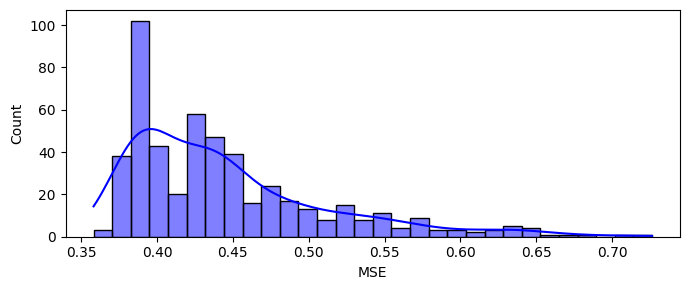

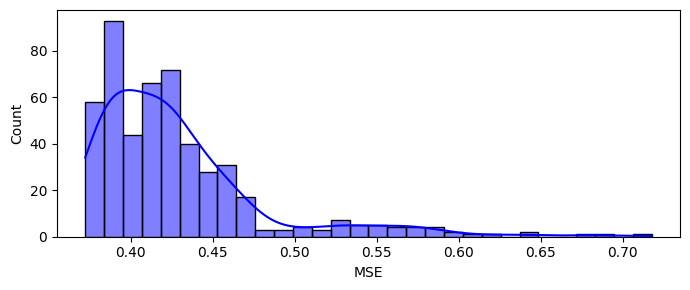

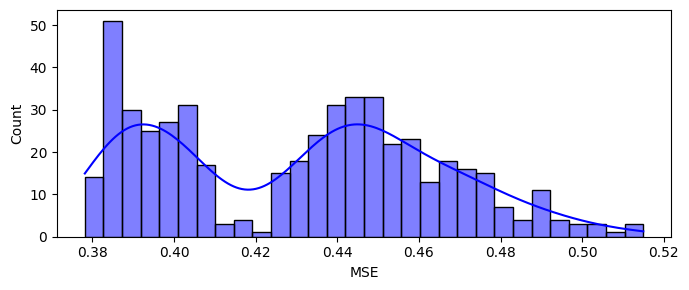

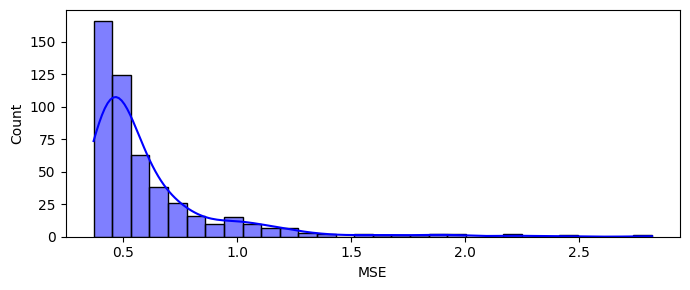

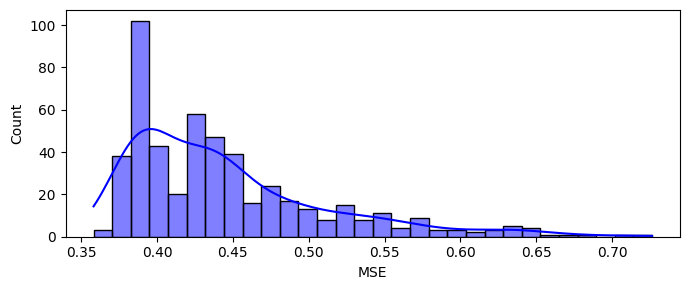

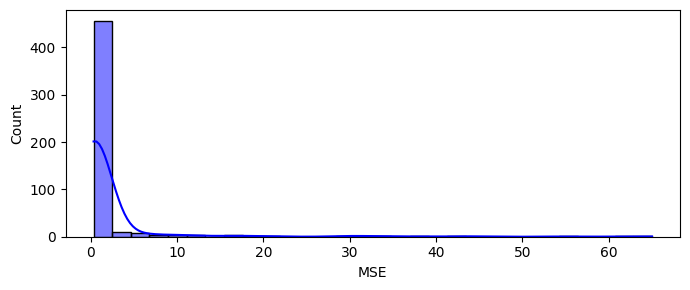

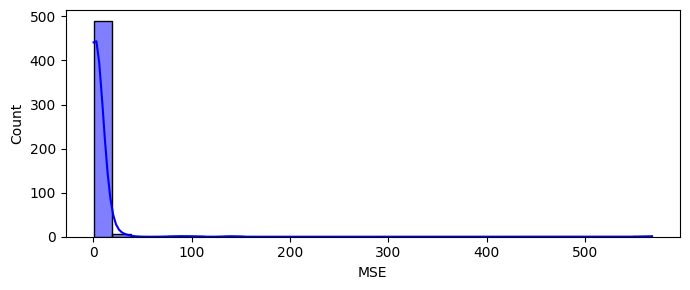

In [20]:
grafico_distribucion(result_mlp["MSE"])
grafico_distribucion(result_cnn["MSE"])
grafico_distribucion(result_lstm["MSE"])
grafico_distribucion(result_transformer["MSE"])
grafico_distribucion(result_gru["MSE"])
grafico_distribucion(result_svr["MSE"])
grafico_distribucion(result_elm["MSE"])

## Test de Friedman


In [21]:
# Convertir los datos en un array 2D
data = np.array([result_lstm["MSE"],result_svr["MSE"],result_elm["MSE"], result_cnn["MSE"],result_gru["MSE"],result_mlp["MSE"],result_transformer["MSE"]])

# Realizar el test de Friedman
statistic, p_value = friedmanchisquare(*data)
print('stat=%.3f, p=%.3f' % (statistic, p_value))
nivel_significancia = 0.05
# Verificar si se rechaza o no la hipótesis nula
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")

stat=1940.620, p=0.000
Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


kruskal

In [24]:
from scipy.stats import kruskal
# Convertir los datos en un array 2D
data = np.array([result_lstm["MSE"],result_svr["MSE"],result_elm["MSE"], result_cnn["MSE"],result_gru["MSE"],result_mlp["MSE"],result_transformer["MSE"]])

# Realizar el test de Friedman
statistic, p_value = kruskal(*data)
print('stat=%.3f, p=%.3f' % (statistic, p_value))
nivel_significancia = 0.05
# Verificar si se rechaza o no la hipótesis nula
if p_value < nivel_significancia:
    print("Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.")
else:
    print("No se rechaza la hipótesis nula. No hay diferencias significativas entre las medianas de los grupos.")

stat=1238.629, p=0.000
Se rechaza la hipótesis nula. Hay diferencias significativas entre las medianas de los grupos.


## post-hoc 1

In [26]:
# Combinar los datos en un DataFrame
data_mse = pd.DataFrame({'LSTM':result_lstm["MSE"],"SRV":result_svr["MSE"], "ELM":result_elm["MSE"], 'CNN':result_cnn["MSE"], 'MLP': result_mlp["MSE"],'GRU': result_gru["MSE"],'Transformer':result_transformer["MSE"]})
data_time = pd.DataFrame({'LSTM':result_lstm["time"],"SRV":result_svr["time"], "ELM":result_elm["time"], 'CNN':result_cnn["time"], 'MLP': result_mlp["time"],'GRU': result_gru["time"],'Transformer':result_transformer["time"]})

In [35]:
posthoc_df = sp.posthoc_mannwhitney([result_lstm["MSE"],result_svr["MSE"],result_elm["MSE"],result_cnn["MSE"],result_mlp["MSE"],result_gru["MSE"],result_transformer["MSE"]], p_adjust = 'bonferroni')
group_names= ["LSTM", "SRV","ELM","CNN","MLP","GRU","Transformer"]
posthoc_df.columns= group_names
posthoc_df.index= group_names
posthoc_df.style.applymap(lambda x: "background-color:violet" if x<0.05 else "background-color: white")

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
LSTM,1.000000,0.000003,0.000000,0.000272,1.000000,1.000000,0.000000
SRV,0.000003,1.000000,0.000000,0.000000,0.001456,0.001456,0.000000
ELM,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
CNN,0.000272,0.000000,0.000000,1.000000,0.000903,0.000903,0.000000
MLP,1.000000,0.001456,0.000000,0.000903,1.000000,1.000000,0.000000
GRU,1.000000,0.001456,0.000000,0.000903,1.000000,1.000000,0.000000
Transformer,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000


In [ ]:
sp.posthoc_nemenyi_friedman(data_mse.T.T)

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
LSTM,1.000000,0.001183,0.001,0.001,0.506329,0.900000,0.001
SRV,0.001183,1.000000,0.001,0.001,0.322023,0.003576,0.001
ELM,0.001000,0.001000,1.000,0.001,0.001000,0.001000,0.001
CNN,0.001000,0.001000,0.001,1.000,0.001000,0.001000,0.001
MLP,0.506329,0.322023,0.001,0.001,1.000000,0.669875,0.001
GRU,0.900000,0.003576,0.001,0.001,0.669875,1.000000,0.001
Transformer,0.001000,0.001000,0.001,0.001,0.001000,0.001000,1.000


In [28]:
data_mse.describe()

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.430104,1.947430,4.455969,0.427872,0.445046,0.445046,0.611782
std,0.033879,6.750632,26.885869,0.052226,0.065764,0.065764,0.308606
min,0.378168,0.348409,0.410243,0.372284,0.358205,0.358205,0.370745
25%,0.397949,0.399784,0.638537,0.391172,0.392493,0.392493,0.432704
50%,0.435842,0.447894,1.047988,0.417368,0.429932,0.429932,0.501524
75%,0.454799,0.538114,3.045832,0.442763,0.472743,0.472743,0.658272
max,0.514973,65.016380,567.946069,0.717528,0.726334,0.726334,2.821052


In [29]:
data_time.describe()

,LSTM,SRV,ELM,CNN,MLP,GRU,Transformer
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,22.039561,0.023899,0.035654,11.927903,12.792976,12.792976,49.570536
std,10.916983,0.023569,0.045224,6.601796,5.588001,5.588001,26.035597
min,7.461479,0.003211,0.001139,3.642240,4.256556,4.256556,5.150543
25%,14.611851,0.007815,0.008908,7.186462,8.685569,8.685569,30.751829
50%,18.980654,0.016295,0.019036,10.003756,11.369007,11.369007,44.582412
75%,25.663922,0.031122,0.039219,14.754041,15.294711,15.294711,61.918747
max,86.680831,0.177377,0.280520,45.497210,35.655194,35.655194,153.094455
